In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\hp\Downloads\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')
data1 = data.iloc[:,2:]
data1


,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M,T2MDEW,TS,T2M_RANGE,QV2M,PRECTOTCORR,WS2M,WS10M_RANGE,WD2M,WS2M_RANGE
0,0.93,0.17,7.26,22.05,18.82,23.37,8.40,13.49,3.83,5.95,7.39,243.25,6.24
1,1.02,0.20,9.95,15.91,10.96,21.39,4.67,8.18,0.01,7.44,3.09,346.69,2.54
2,0.84,0.16,7.33,14.69,8.51,20.40,3.27,6.90,0.48,5.20,2.48,332.62,2.00
3,1.04,0.20,9.45,12.85,6.64,19.65,5.00,6.10,0.24,5.94,2.01,309.88,1.61
4,0.98,0.20,9.05,12.67,8.58,19.29,3.64,6.90,0.00,6.46,2.26,314.88,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,0.70,0.13,5.99,20.23,17.94,22.16,1.87,12.63,8.82,4.82,3.41,154.69,2.87
4744,0.97,0.20,9.39,21.96,17.52,22.73,2.38,12.27,0.01,5.28,0.70,58.12,0.62
4745,0.88,0.17,7.76,23.26,19.98,23.56,1.68,14.34,0.24,5.59,1.73,62.94,1.45
4746,1.02,0.20,9.08,24.47,21.51,24.21,1.76,15.81,0.15,2.93,2.91,116.94,2.33


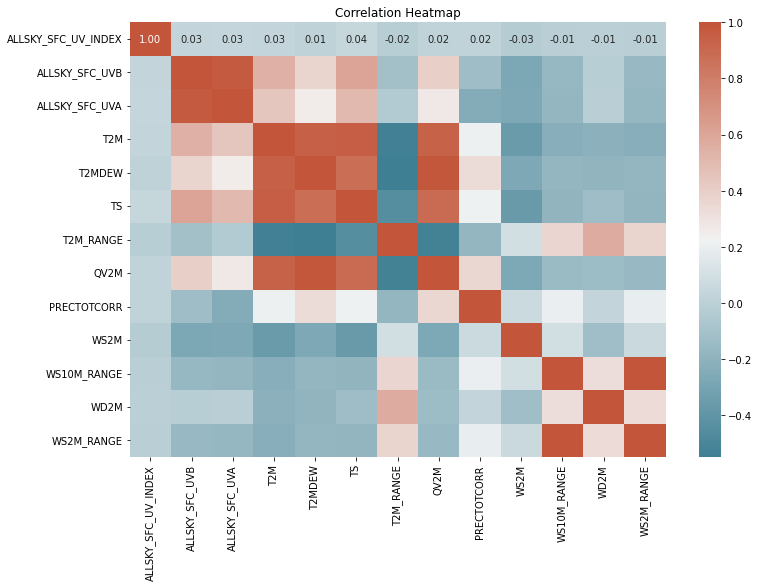

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv('your_data.csv')

# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Create a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r'C:\Users\hp\Downloads\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')


g = sns.FacetGrid(data=data, col="YEAR", col_wrap=4, sharey=False)


g.map(sns.kdeplot, "ALLSKY_SFC_UVB", alpha=0.5,  fill=True ,legend = True)


g.fig.suptitle('Density Plot of ALLSKY_SFC_UVB (by Year)')


plt.show()


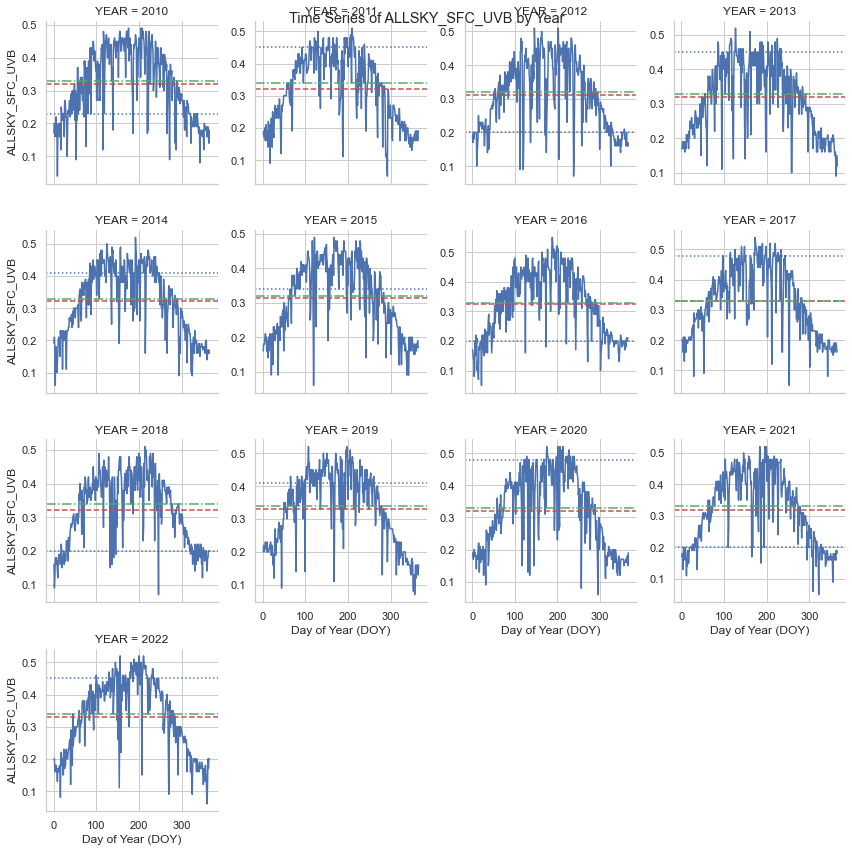

In [60]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

data = pd.read_csv(r'C:\\Users\\hp\\Downloads\\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')

# Create a facet grid
g = sns.FacetGrid(data=data, col="YEAR", col_wrap=4, sharey=False)

# Plot a line plot for each year
g.map(sns.lineplot, "DOY", "ALLSKY_SFC_UVB")

# Add a mean line to each plot
g.map(lambda x, y, **kwargs: plt.axhline(y=np.mean(y), color='r', linestyle='--'), "DOY", "ALLSKY_SFC_UVB")

# Add a median line to each plot
g.map(lambda x, y, **kwargs: plt.axhline(y=np.median(y), color='g', linestyle='-.'), "DOY", "ALLSKY_SFC_UVB")

# Add a mode line to each plot
g.map(lambda x, y, **kwargs: plt.axhline(y=stats.mode(y)[0], color='b', linestyle=':'), "DOY", "ALLSKY_SFC_UVB")

# Add labels and a title
g.set_axis_labels("Day of Year (DOY)", "ALLSKY_SFC_UVB")
g.fig.suptitle('Time Series of ALLSKY_SFC_UVB by Year')

# Show the plot
plt.show()




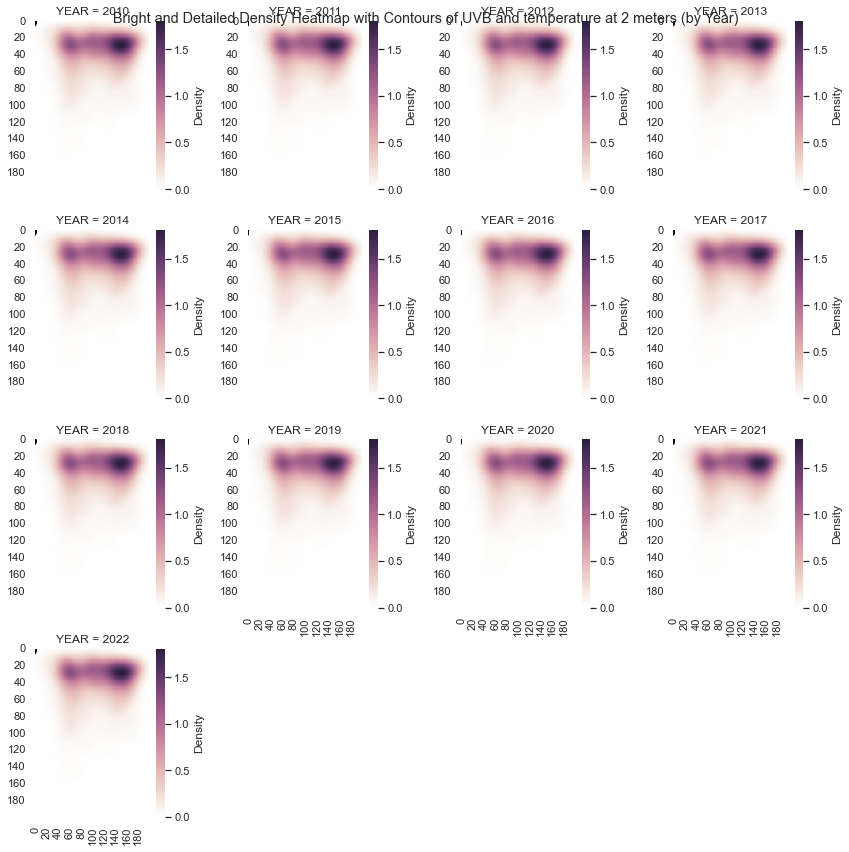

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

# Load the data
data = pd.read_csv(r'C:\Users\hp\Downloads\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')

# Handle missing or invalid data (if necessary)
data = data.dropna()

# Create a FuzzyCMeans model
from skfuzzy.cluster import cmeans

n_clusters = 3  # Set the number of clusters
fcm = cmeans(data[['ALLSKY_SFC_UVB', 'TS']].T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Predict the cluster labels for each data point
cluster_labels = fcm[1].argmax(axis=0)

# Add the cluster labels to the data
data['cluster_label'] = cluster_labels

# Create a facet grid
g = sns.FacetGrid(data=data, col="YEAR", col_wrap=4, sharey=False)

# Calculate the 2D density of the data
x = data['ALLSKY_SFC_UVB']
y = data['T2M_RANGE']
kde = gaussian_kde([x, y])

# Create a 2D grid for the density heatmap
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 200), np.linspace(min(y), max(y), 200))
density = kde([x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

# Set a brighter colormap and style
sns.set(style="whitegrid")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Plot a heatmap to represent the density with enhancements
g.map(sns.heatmap, data=density, cmap=cmap, cbar=True, cbar_kws={'label': 'Density'},
       xticklabels=20, yticklabels=20, annot=False)

# Add density contours using matplotlib
for ax in g.axes.flat:
    ax.contour(x_grid, y_grid, density, colors='black', linestyles='dashed', levels=20)  # Increase levels for more detail

# Add labels and a title
g.fig.suptitle('Bright and Detailed Density Heatmap with Contours of UVB and temperature at 2 meters (by Year)')

# Show the plot
plt.show()


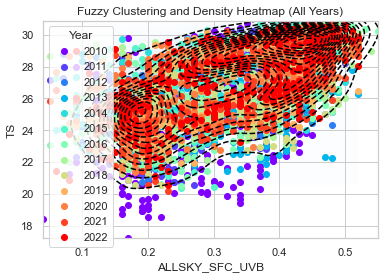

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from skfuzzy.cluster import cmeans
import matplotlib.cm as cm

# Load your data or define it here (data should contain information for all years)
data = pd.read_csv(r'C:\Users\hp\Downloads\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')


# Handle missing or invalid data (if necessary)
data = data.dropna()

# Create a FuzzyCMeans model
n_clusters = 3  # Set the number of clusters
fcm = cmeans(data[['ALLSKY_SFC_UVB', 'TS']].T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Predict the cluster labels for each data point
cluster_labels = fcm[1].argmax(axis=0)

# Add the cluster labels to the data
data['cluster_label'] = cluster_labels

# Calculate the 2D density of the data
x = data['ALLSKY_SFC_UVB']
y = data['TS']
kde = gaussian_kde([x, y])

# Create a 2D grid for the density heatmap
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 200), np.linspace(min(y), max(y), 200))
density = kde([x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

# Set a brighter colormap and style
sns.set(style="whitegrid")

# Create a single figure and axis
fig, ax = plt.subplots()

# Define a list of colors for each year
colors = cm.rainbow(np.linspace(0, 1, len(data['YEAR'].unique())))

for i, year in enumerate(data['YEAR'].unique()):
    year_data = data[data['YEAR'] == year]
    x = year_data['ALLSKY_SFC_UVB']
    y = year_data['TS']
    ax.scatter(x, y, label=str(year), c=[colors[i]])

# Plot a heatmap to represent the density with enhancements
ax.imshow(density, cmap='Blues', extent=(min(x), max(x), min(y), max(y)), aspect='auto', origin='lower', alpha=0.5)

# Add density contours using matplotlib
ax.contour(x_grid, y_grid, density, colors='black', linestyles='dashed', levels=20)

# Add labels and a title
ax.set_xlabel('ALLSKY_SFC_UVB')
ax.set_ylabel('TS')
ax.set_title('Fuzzy Clustering and Density Heatmap (All Years)')
ax.legend(title='Year')

# Show the plot
plt.show()


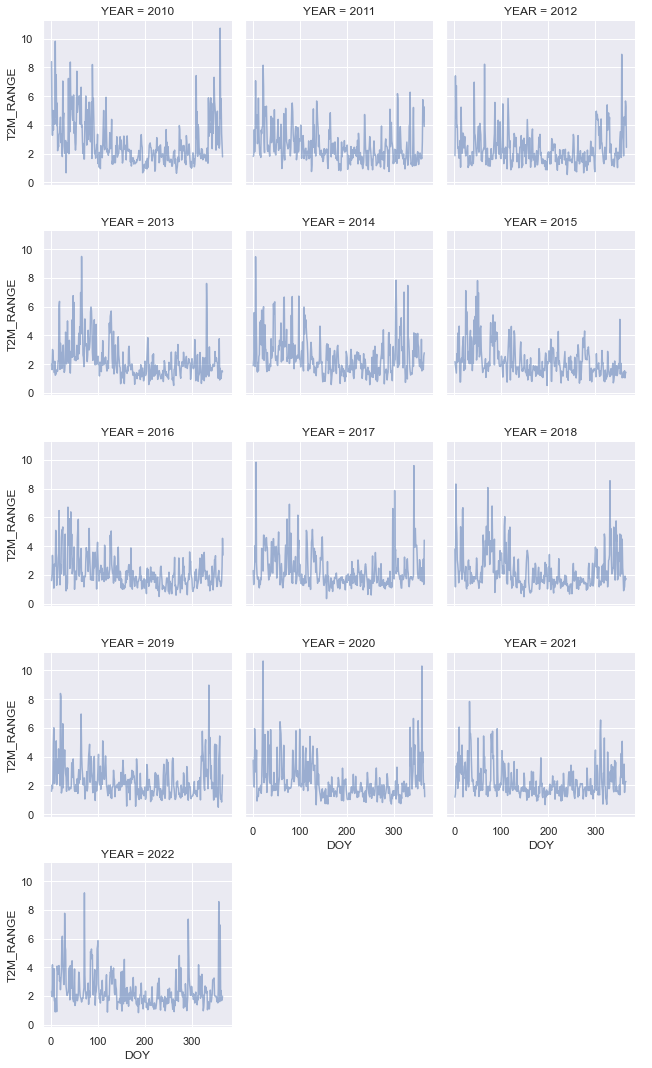

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\hp\Downloads\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')
years = data['YEAR'].unique()

g = sns.FacetGrid(data=data, col="YEAR", col_wrap=3)
g.map_dataframe(sns.lineplot, x="DOY", y="T2M_RANGE", alpha=0.5)
g.add_legend()
plt.show()


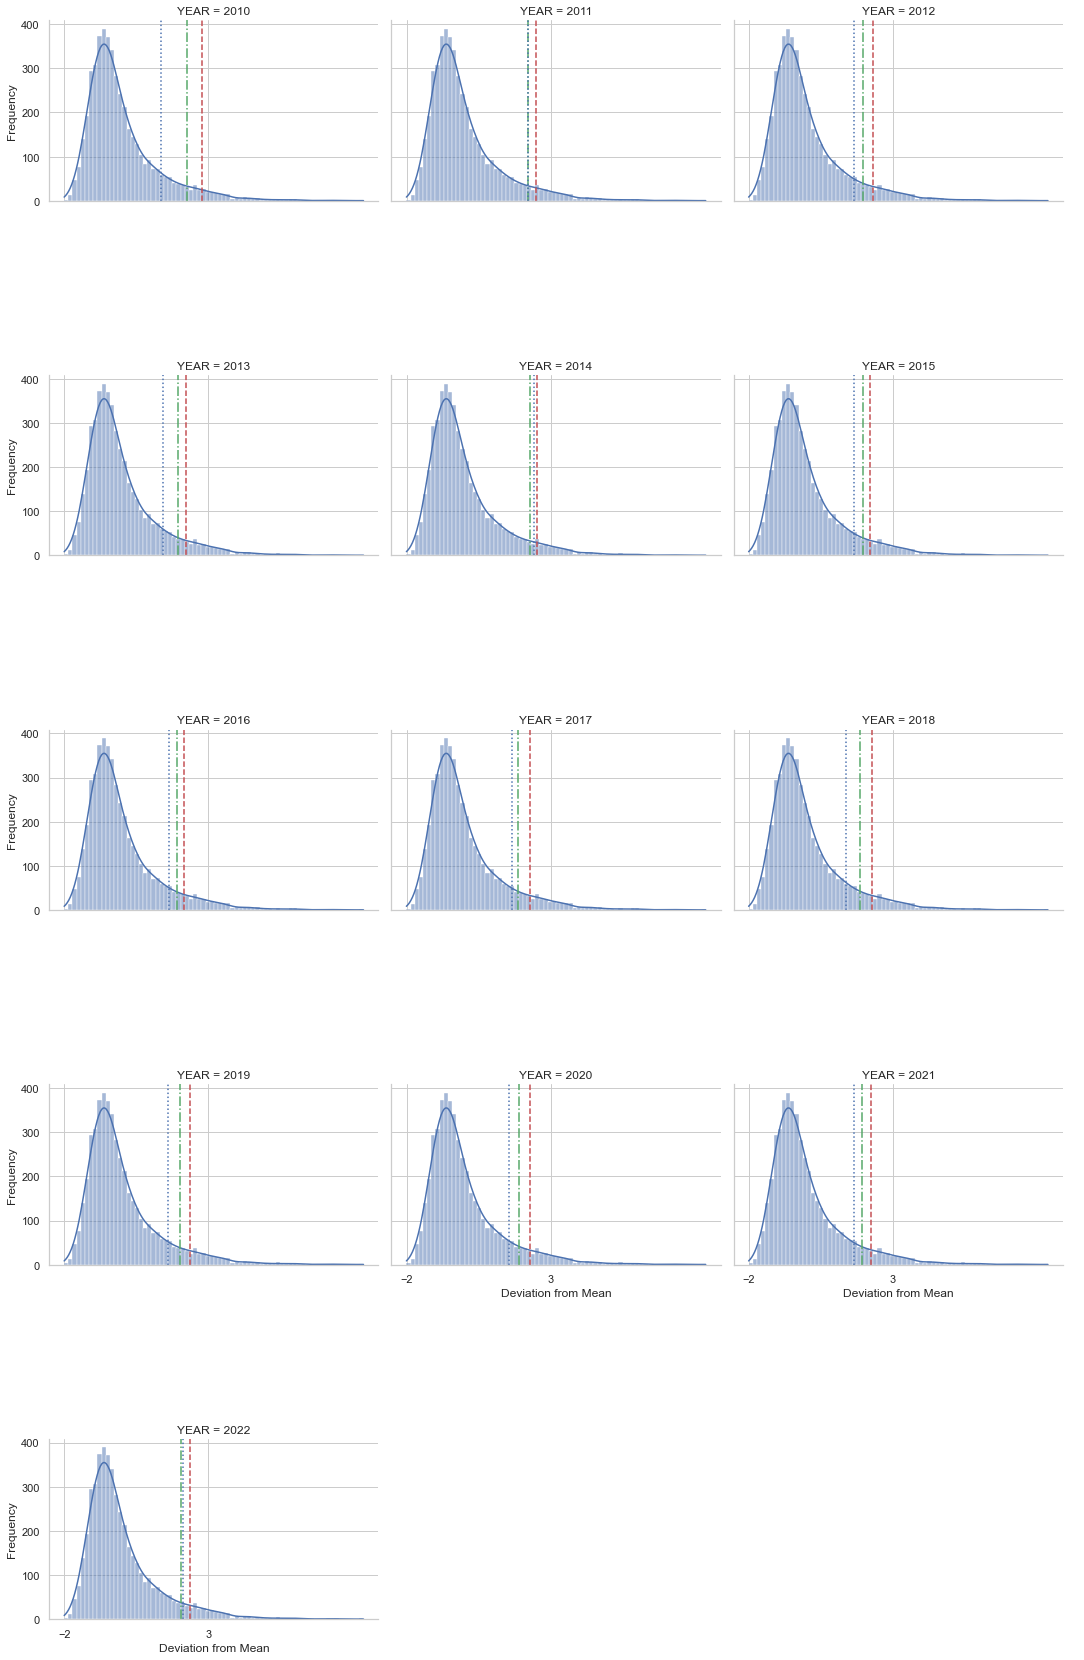

In [64]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = pd.read_csv(r'C:\\Users\\hp\\Downloads\\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')

# Calculate the deviation from the mean for each 'T2M_RANGE' value
deviation = data['T2M_RANGE'] - data['T2M_RANGE'].mean()

# Set the height of the FacetGrid
g = sns.FacetGrid(data=data, col="YEAR", col_wrap=3, height=5)
g.map_dataframe(sns.histplot, deviation, kde=True, alpha=0.5)

# Add a mean line to each plot
g.map_dataframe(lambda data, color: plt.axvline(x=np.mean(data[deviation.name]), color='r', linestyle='--'))

# Add a median line to each plot
g.map_dataframe(lambda data, color: plt.axvline(x=np.median(data[deviation.name]), color='g', linestyle='-.'))

# Add a mode line to each plot
g.map_dataframe(lambda data, color: plt.axvline(x=stats.mode(data[deviation.name])[0][0], color='b', linestyle=':'))

# Set x-tick labels
g.set(xticks=np.arange(int(deviation.min()), int(deviation.max()), step=5))

g.set_axis_labels("Deviation from Mean", "Frequency")  # Add x and y axis labels
g.add_legend()
plt.show()




<Figure size 432x288 with 0 Axes>

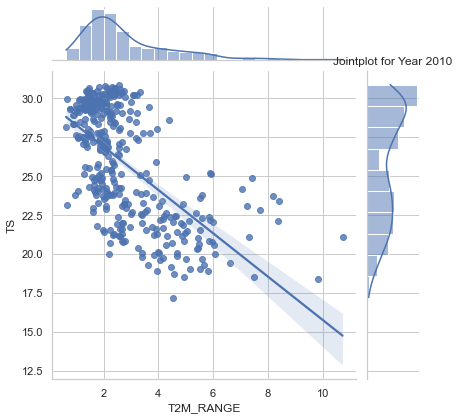

<Figure size 432x288 with 0 Axes>

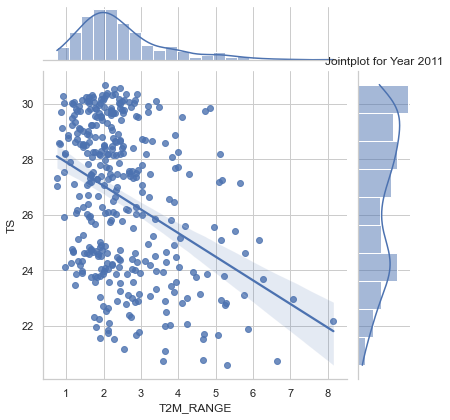

<Figure size 432x288 with 0 Axes>

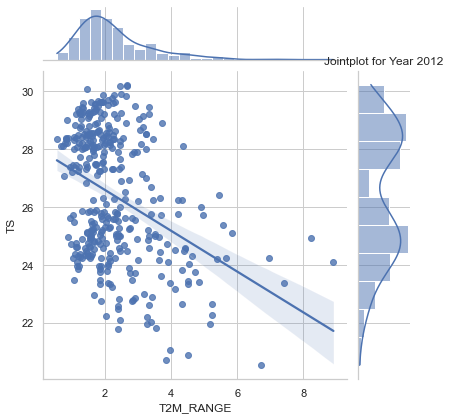

<Figure size 432x288 with 0 Axes>

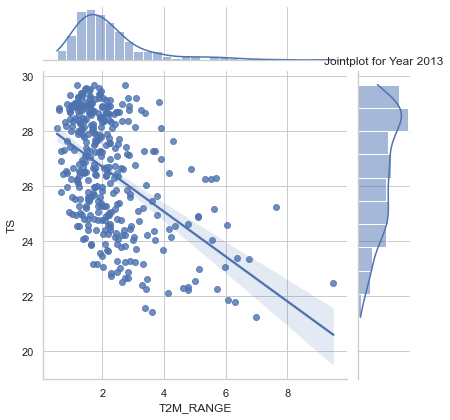

<Figure size 432x288 with 0 Axes>

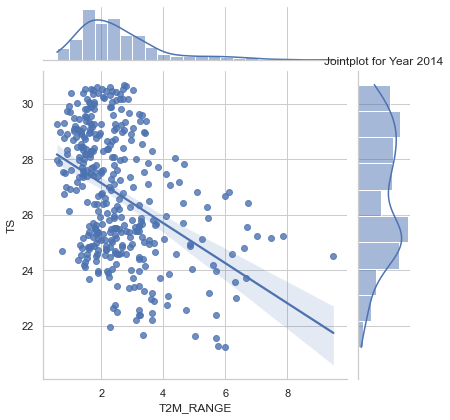

<Figure size 432x288 with 0 Axes>

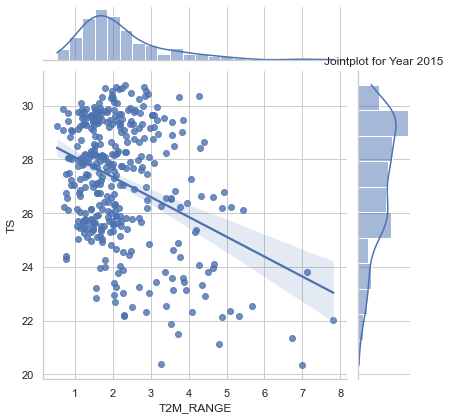

<Figure size 432x288 with 0 Axes>

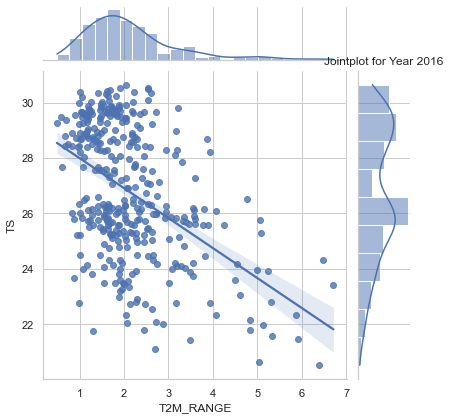

<Figure size 432x288 with 0 Axes>

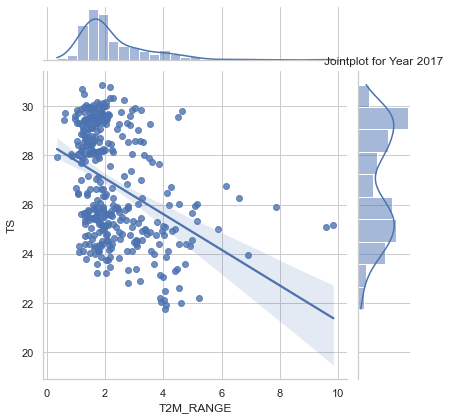

<Figure size 432x288 with 0 Axes>

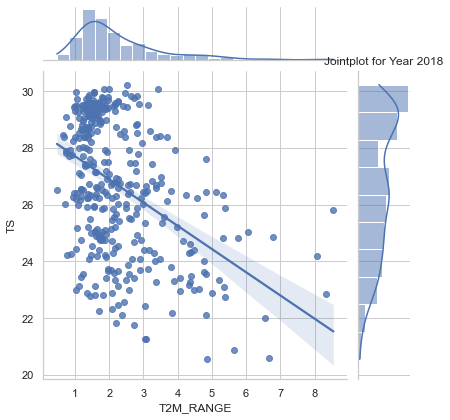

<Figure size 432x288 with 0 Axes>

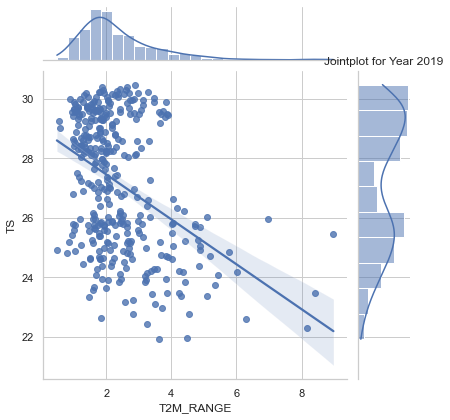

<Figure size 432x288 with 0 Axes>

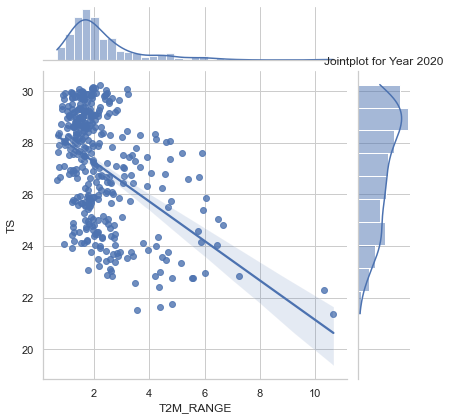

<Figure size 432x288 with 0 Axes>

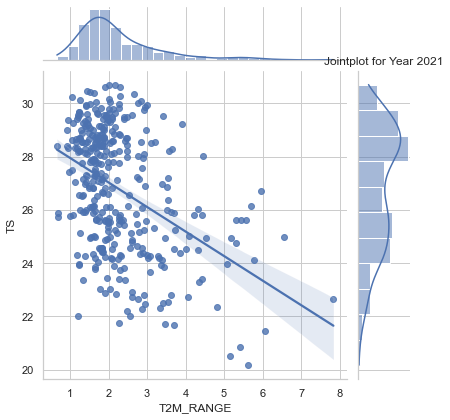

<Figure size 432x288 with 0 Axes>

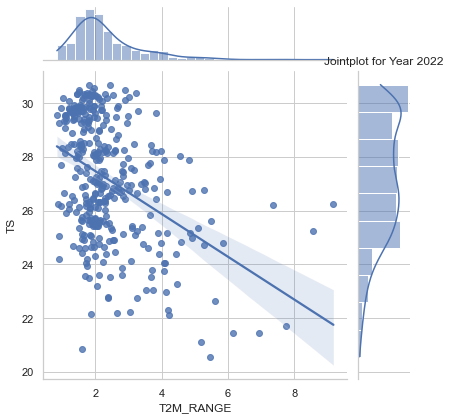

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with columns 'T2M_RANGE', 'TS', and 'YEAR'
data = pd.read_csv(r'C:\Users\hp\Downloads\POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')

years = range(2010, 2023)

for year in years:
    data_year = data[data['YEAR'] == year]
    plt.figure()
    sns.jointplot(x='T2M_RANGE', y='TS', data=data_year, kind='reg')
    plt.title(f'Jointplot for Year {year}')
    plt.show()
